In [446]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0-beta0
sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.0
pandas 0.24.2
sklearn 0.21.3
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [447]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [448]:
import pprint
pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])



array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [449]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test = train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_all,y_train_all,random_state=11)


In [450]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)
x_valid_std = std.transform(x_valid)



In [451]:
# 1.转化为sklean的model
# 2.定义参数集合
# 3.搜索参数 

"""创建模型的函数"""
def build_model(hidden_layers = 1,
                layer_size = 30,            
                learning_rate = 3e-3):
    
    
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(units=layer_size,activation="relu",
                                 input_shape=x_train.shape[1:]))
    
    # model.add(keras.layers.Dense(layer_size, activation='relu',
    #                          input_shape=x_train.shape[1:]))
    
    for _ in range(hidden_layers-1):
        model.add(keras.layers.Dense(units=layer_size,activation="relu"))
                
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse',optimizer=optimizer)
    return model
callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

# callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)
history = sklearn_model.fit(x_train_std,y_train,epochs = 10,
                  validation_data = (x_valid_std,y_valid),
                 callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 0s 29us/sample - loss: 1.1670 - val_loss: 0.7228
Epoch 2/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.6221 - val_loss: 0.6352
Epoch 3/10
11610/11610 [==============================] - 0s 21us/sample - loss: 0.5621 - val_loss: 0.5853
Epoch 4/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5252 - val_loss: 0.5508
Epoch 5/10
11610/11610 [==============================] - 0s 21us/sample - loss: 0.5008 - val_loss: 0.5285
Epoch 6/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4837 - val_loss: 0.5106
Epoch 7/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4715 - val_loss: 0.4965
Epoch 8/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4606 - val_loss: 0.4882
Epoch 9/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4508 - val_l

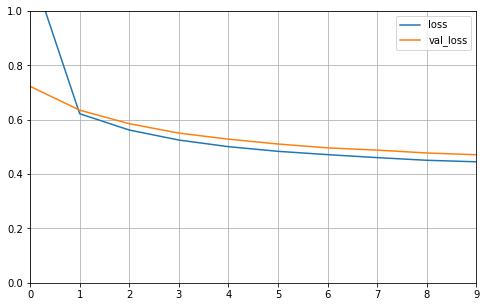

In [452]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [453]:
# from scipy.stats import reciprocal
# 
# param_distribution = {
#     "hidden_layers":[1, 2, 3, 4],
#     "layer_size": np.arange(1, 100),
#     "learning_rate": reciprocal(1e-4, 1e-2),
# }
# 
# from sklearn.model_selection import RandomizedSearchCV
# 
# random_search_cv = RandomizedSearchCV(sklearn_model,
#                           param_distribution,
#                           n_iter=10,
#                           n_jobs = 1)
# random_search_cv.fit(x_train_std,y_train,epochs = 100,
#          validation_data = (x_valid_std,y_valid),
#          callbacks = callbacks)


In [454]:
from scipy.stats import reciprocal
# f(x) = 1/(x*log(b/a)) a <= x <= b

param_distribution = {
    "hidden_layers":[1, 2, 3, 4],
    "layer_size": np.arange(1, 100),
    "learning_rate": reciprocal(1e-4, 1e-2),
}
from sklearn.model_selection import RandomizedSearchCV

random_search_cv = RandomizedSearchCV(sklearn_model,
                                      param_distribution,
                                      n_iter = 10,
                                      # cv = 3,
                                      n_jobs = 1)
random_search_cv.fit(x_train_std, y_train, epochs = 100,
                     validation_data = (x_valid_std, y_valid),
                     callbacks = callbacks)

d:\python\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 34us/sample - loss: 3.0842 - val_loss: 1.9521
Epoch 2/100
7740/7740 [==============================] - 0s 23us/sample - loss: 1.4463 - val_loss: 1.1954
Epoch 3/100
7740/7740 [==============================] - 0s 23us/sample - loss: 1.0179 - val_loss: 0.9699
Epoch 4/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.8756 - val_loss: 0.8841
Epoch 5/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.8136 - val_loss: 0.8408
Epoch 6/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7787 - val_loss: 0.8125
Epoch 7/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7541 - val_loss: 0.7907
Epoch 8/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7345 - val_loss: 0.7725
Epoch 9/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7179 - val_loss: 0.755

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002CBE2392160>,
                   iid='warn', n_iter=10, n_jobs=1,
                   param_distributions={'hidden_layers': [1, 2, 3, 4],
                                        'layer_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002CBD4B959B0>},
                   pre_dispatch='2*n_jobs', random_state=None, r

In [455]:
model = random_search_cv.best_estimator_.model
model.fit(x_train_std,y_train,validation_data = (x_valid_std,y_valid),epochs = 10)
model.evaluate(x_test_std,y_test)


Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.2955 - val_loss: 0.3246
Epoch 2/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.2934 - val_loss: 0.3265
Epoch 3/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.2950 - val_loss: 0.3168
Epoch 4/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.2919 - val_loss: 0.3161
Epoch 5/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.2916 - val_loss: 0.3149
Epoch 6/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.2866 - val_loss: 0.3095
Epoch 7/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.2861 - val_loss: 0.3099
Epoch 8/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.2842 - val_loss: 0.3131
Epoch 9/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.2835 - val_l

0.31631678042485734